In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}

df0 = pd.read_csv('monster-categories.csv')

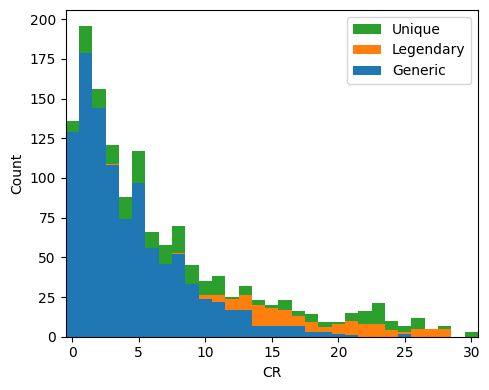

In [2]:
# Ability score modifier
from matplotlib import pyplot as plt
import numpy as np

rMin = 0; rMax = 30; rDel = 1.0
rLims = [rMin - rDel/2, rMax + rDel/2]
rRange = np.linspace(rMin - rDel/2, rMax + rDel/2, int(round((rMax - rMin)/rDel)) + 2)

fig = plt.figure(figsize=[5,4], dpi=100, tight_layout=True)
ax = plt.axes(xlim=rLims, xlabel='CR', ylabel='Count')

ax.hist((
    df0[df0['Category'].isin(['generic'])]['CR'],
    df0[df0['Category'].isin(['legendary'])]['CR'],
    df0[df0['Category'].isin(['unique'])]['CR']), 
    rRange, density=False, histtype='stepfilled', stacked=True, label=['Generic','Legendary','Unique'])
ax.legend()

plt.savefig('monster-distribution.svg', metadata=METADATA)